In [ ]:
#import librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#read csv.file
df = pd.read_csv('/content/drive/MyDrive/new drive/neural network/weatherAUS.csv')

In [ ]:
# Checking that is that dataset imbalanced or balanced
# Check class balance in the target column. Assuming 'RainTomorrow' is the target.
class_counts = df['RainTomorrow'].value_counts(dropna=False)
class_counts_percentage = df['RainTomorrow'].value_counts(normalize=True, dropna=False) * 100

class_counts, class_counts_percentage

(RainTomorrow
 No     110316
 Yes     31877
 NaN      3267
 Name: count, dtype: int64,
 RainTomorrow
 No     75.839406
 Yes    21.914616
 NaN     2.245978
 Name: proportion, dtype: float64)

In [ ]:
from sklearn.utils import resample

# Drop NaNs in target
df_bal = df.dropna(subset=['RainTomorrow'])

# Separate majority and minority classes
df_majority = df_bal[df_bal['RainTomorrow'] == 'No']
df_minority = df_bal[df_bal['RainTomorrow'] == 'Yes']

# Downsample majority class
df_majority_downsampled = resample(df_majority,replace=False,n_samples=len(df_minority),random_state=42)

# Combine
df_balanced = pd.concat([df_majority_downsampled, df_minority])
# Checking that is that dataset imbalanced or balanced
# Check class balance in the target column. Assuming 'RainTomorrow' is the target.
class_counts = df['RainTomorrow'].value_counts(dropna=False)
class_counts_percentage = df['RainTomorrow'].value_counts(normalize=True, dropna=False) * 100

class_counts, class_counts_percentage


(RainTomorrow
 No     110316
 Yes     31877
 NaN      3267
 Name: count, dtype: int64,
 RainTomorrow
 No     75.839406
 Yes    21.914616
 NaN     2.245978
 Name: proportion, dtype: float64)

In [ ]:
from sklearn.utils import resample

# Drop NaNs in target
df_clean = df.dropna(subset=['RainTomorrow'])

# Separate majority and minority classes
df_majority = df_clean[df_clean['RainTomorrow'] == 'No']
df_minority = df_clean[df_clean['RainTomorrow'] == 'Yes']

# Downsample majority class to match minority
df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

# Combine to get balanced dataset
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Check class distribution
balanced_counts = df_balanced['RainTomorrow'].value_counts()
balanced_percentages = df_balanced['RainTomorrow'].value_counts(normalize=True) * 100

balanced_counts, balanced_percentages

(RainTomorrow
 No     31877
 Yes    31877
 Name: count, dtype: int64,
 RainTomorrow
 No     50.0
 Yes    50.0
 Name: proportion, dtype: float64)

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
#shape
df.shape

(145460, 23)

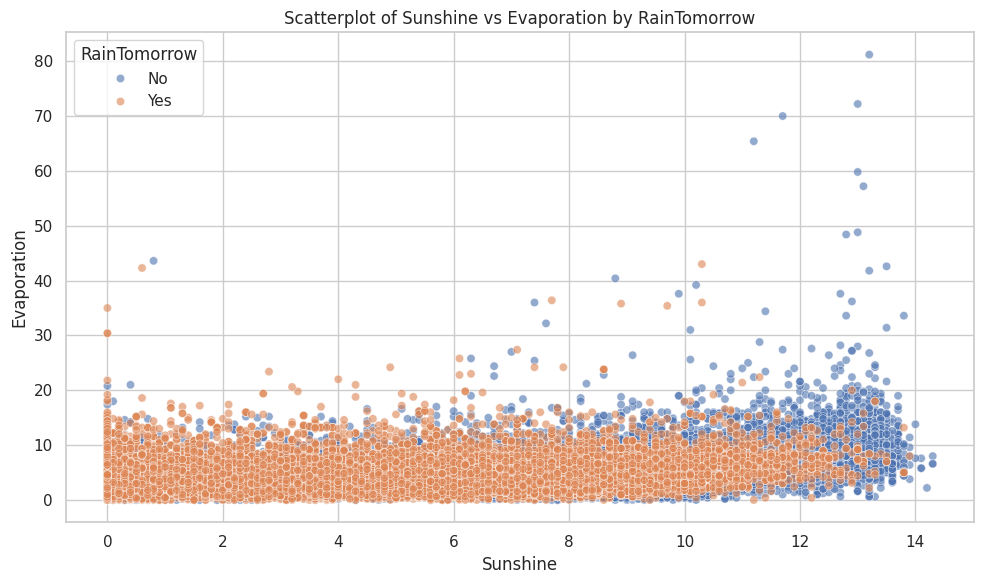

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# We'll use 'Sunshine' vs. 'Evaporation' to visualize missing data impact
# Filter rows where both are not missing
scatter_data = df_balanced[['Sunshine', 'Evaporation', 'RainTomorrow']].dropna()

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scatter_data, x='Sunshine', y='Evaporation', hue='RainTomorrow', alpha=0.6)
plt.title("Scatterplot of Sunshine vs Evaporation by RainTomorrow")
plt.xlabel("Sunshine")
plt.ylabel("Evaporation")
plt.legend(title="RainTomorrow")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Step 2: Prepare the dataset
# Drop columns with >30% missing
threshold = 0.3
df_reduced = df_balanced.loc[:, df_balanced.isnull().mean() < threshold]

# Drop remaining rows with missing values
df_reduced.dropna(inplace=True)

# Separate features and target
X = df_reduced.drop('RainTomorrow', axis=1)
y = df_reduced['RainTomorrow']

# Encode categorical variables
X_encoded = pd.get_dummies(X)

# Encode target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Step 3: Build ANN model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

test_accuracy

<ipython-input-15-8bba54f0acd0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced.dropna(inplace=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


0.7990069389343262

315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


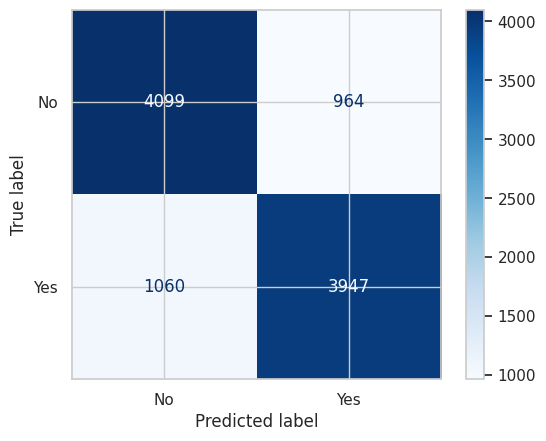

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')

In [ ]:
import numpy as np

# 1. Pick 5 random rows from test set
X_custom = X_test[:5]    # first 5 rows (you can also use .sample(5))

# 2. Predict
y_pred_prob = model.predict(X_custom)
y_pred_custom = (y_pred_prob > 0.5).astype(int).flatten()

# 3. Print Results
print("Predicted labels:", y_pred_custom)
print("Actual labels:   ", y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted labels: [0 1 1 0 1]
Actual labels:    [0 1 0 0 1]
